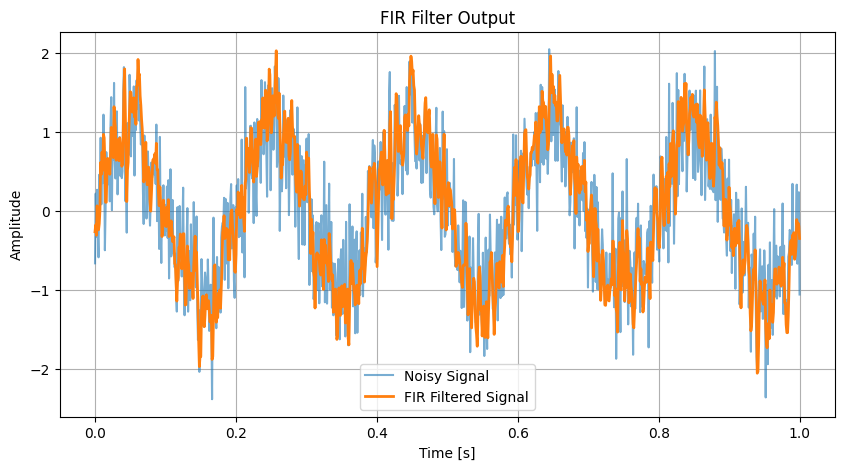

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create time vector
fs = 1000
t = np.linspace(0, 1, fs)

# generate noisy signal
clean_signal = np.sin(2 * np.pi * 5 * t)
noise = 0.5 * np.random.randn(len(t))
noisy_signal = clean_signal + noise

def fir_filter(x, b):
    y = np.zeros(len(x))

    for n in range(len(x)):
        for k in range(len(b)):
            if n - k >= 0:
                y[n] += b[k] * x[n - k]

    return y

# FIR coefficients
b_fir = np.array([0.4, 0.4, 0.4])

# appling FIR filter
y_fir = fir_filter(noisy_signal, b_fir)

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.6)
plt.plot(t, y_fir, label="FIR Filtered Signal", linewidth=2)
plt.title("FIR Filter Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

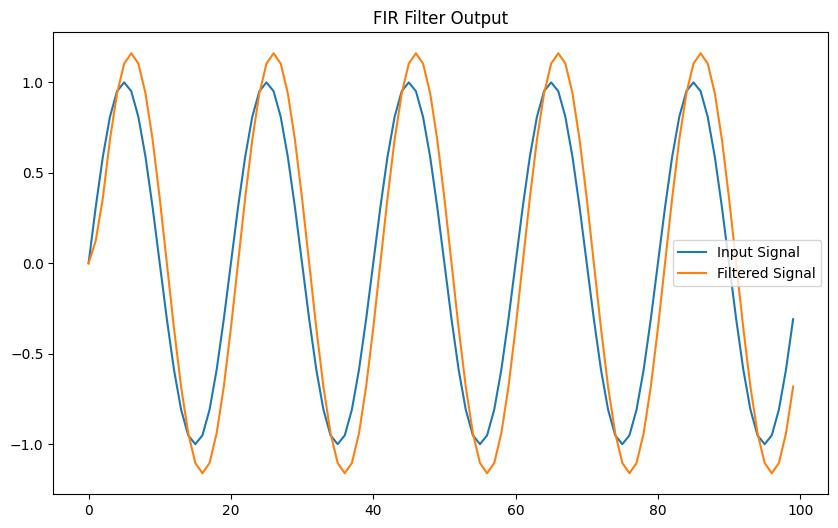

In [4]:
from scipy.signal import freqz

# define FIR filter
def fir_filter(b, x):
    M = len(b)  # number of coefficients
    y = np.convolve(x, b, mode='full')[:len(x)]  # appling filter
    return y

# FIR coefficients and input signal
b = [0.4, 0.4, 0.4]  # FIR coefficients
x = np.sin(2 * np.pi * 0.05 * np.arange(100))  # input signal

# filter the signal
y = fir_filter(b, x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("FIR Filter Output")
plt.show()

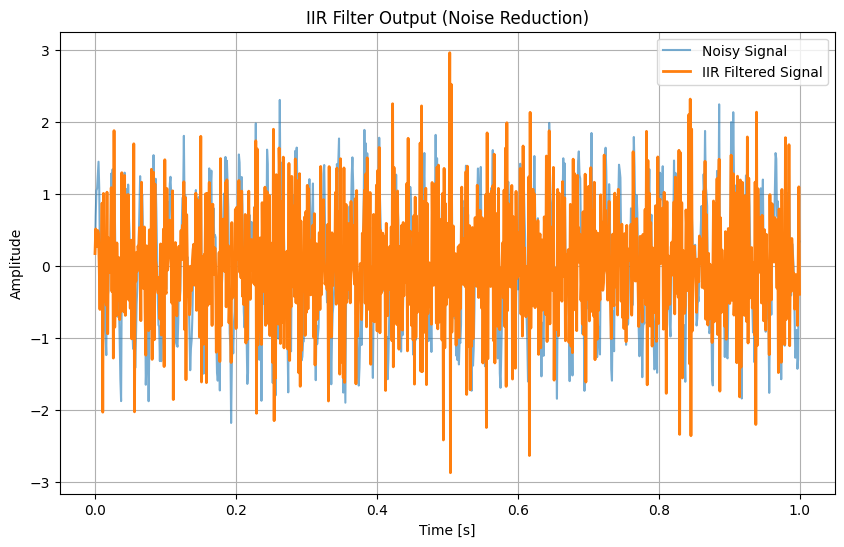

In [18]:
def iir_filter(x, b, a):
    """
    IIR filter implementation.

    Parameters:
    x : ndarray
        Input signal
    b : ndarray
        Numerator coefficients
    a : ndarray
        Denominator coefficients (a[0] = 1)

    Returns:
    y : ndarray
        Filtered output signal
    """
    M = len(b)  # length of numerator coefficients
    N = len(a)  # length of denominator coefficients
    y = np.zeros(len(x))  # output signal

    for n in range(len(x)):
        # feedforward
        x_slice = x[max(0, n - M + 1):n + 1]
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])

        # feedback
        if n >= 1:
            y_slice = y[max(0, n - N + 1):n]
            y[n] -= np.dot(a[1:len(y_slice) + 1], y_slice[::-1])

    return y

# create a noisy sinusoidal signal
fs = 1000  # sampling frequency
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))

# IIR filter coefficients
b = [1, -0.6]   # numerator coefficients
a = [1, 0.5]    # denominator coefficients

# appling IIR filter
y = iir_filter(x, b, a)

# plot
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal", alpha=0.6)
plt.plot(t, y, label="IIR Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Output (Noise Reduction)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

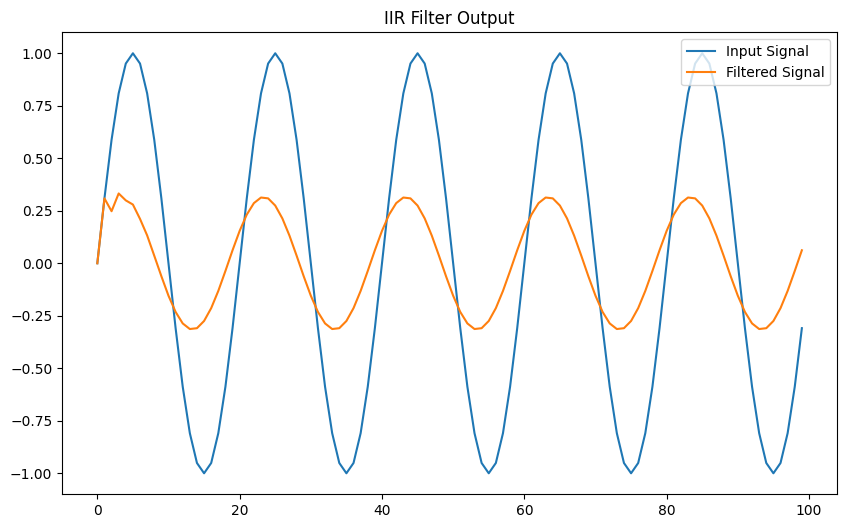

In [19]:
from scipy.signal import lfilter

# define IIR Filter Coefficients
b = [1, -0.6]  # numerator
a = [1, 0.5]   # denominator

# input signal
x = np.sin(2 * np.pi * 0.05 * np.arange(100))

# filter signal
y = lfilter(b, a, x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("IIR Filter Output")
plt.show()

In [20]:
def lms_filter(x, d, mu, M):
    """
    LMS adaptive filter implementation.

    Parameters:
    x : ndarray
        Noisy input signal
    d : ndarray
        Desired (clean) signal
    mu : float
        Step size
    M : int
        Number of filter taps

    Returns:
    y : ndarray
        Filter output
    e : ndarray
        Error signal
    w : ndarray
        Final filter weights
    """
    N = len(x)
    w = np.zeros(M)
    y = np.zeros(N)
    e = np.zeros(N)

    for n in range(M, N):
        x_vec = x[n-M:n][::-1]     # input vector
        y[n] = np.dot(w, x_vec)   # filter output
        e[n] = d[n] - y[n]        # error signal
        w = w + mu * e[n] * x_vec # weight update

    return y, e, w

In [21]:
# desired signal
d = np.sin(2 * np.pi * 5 * np.linspace(0, 1, len(noisy_signal)))

# LMS parameters
mu = 0.1
M = 5

# appling LMS filter
y_lms, e_lms, w_final = lms_filter(noisy_signal, d, mu, M)

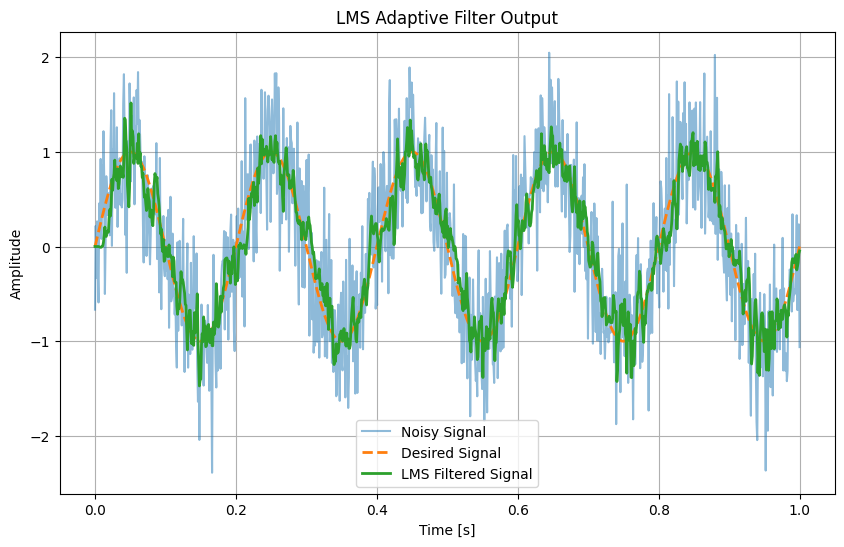

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.5)
plt.plot(t, d, label="Desired Signal", linestyle="--", linewidth=2)
plt.plot(t, y_lms, label="LMS Filtered Signal", linewidth=2)

plt.title("LMS Adaptive Filter Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()